In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Pre-Binary Transformation

## Import & Combine Data

In [50]:
parse_dates = ['asset_contract.created_date', 'collection.created_date']
df_full1 = pd.read_csv('../data/2_data_condensed.csv', low_memory=False, parse_dates=parse_dates)
df_full2 = pd.read_csv('../data/2b_data_condensed_validation_set.csv', low_memory=False, parse_dates=parse_dates)
df_full = pd.concat([df_full1, df_full2], ignore_index=True)

## Create Target

In [51]:
df_full['target'] = np.where((df_full['num_sales'] > 0) | 
                             (df_full['sell_orders'].notna()) | 
                             (df_full['last_sale.event_type'].notna()), 1, 0)

In [52]:
df_full = df_full.drop(labels = ['num_sales', 'sell_orders', 'last_sale.event_type'], axis=1)

## Popular NFT Collections

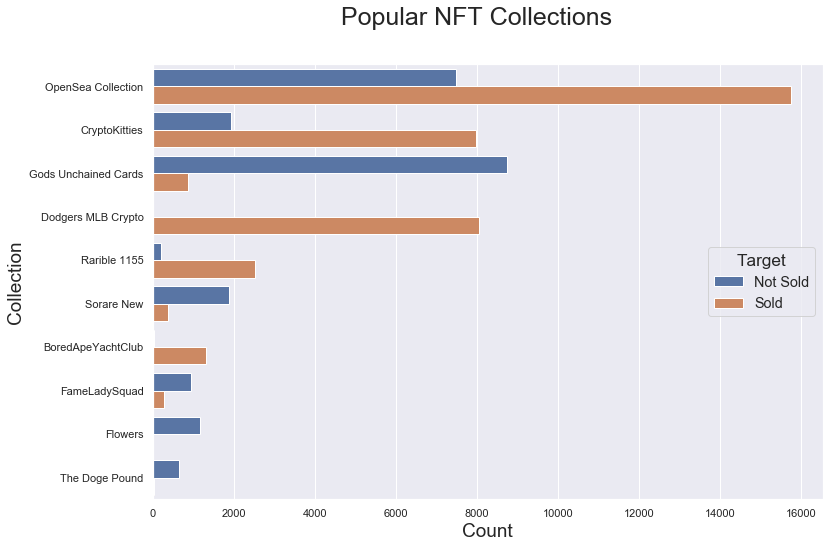

In [53]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(data=df_full,
              y='asset_contract.name',
              hue='target',
              order=df_full['asset_contract.name'].value_counts().iloc[:10].index, 
              ax=ax)
fig.suptitle('Popular NFT Collections', fontsize=25)
ax.set_xlabel('Count', fontsize=19)
ax.set_ylabel('Collection', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='best')

## Datetime Visualizations

### What Years Were NFTs Created?

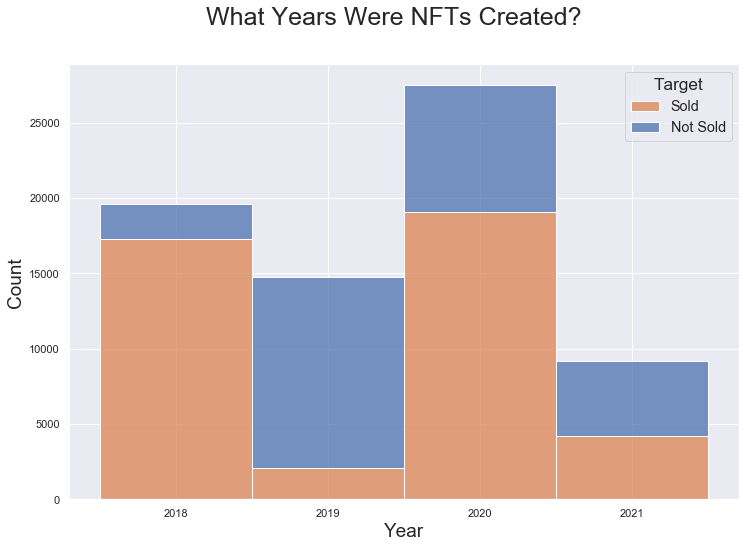

In [54]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(style="darkgrid")
sns.histplot(x=df_full['asset_contract.created_date'].dt.year, 
             hue=df_full['target'],
             hue_order=[0,1],
             discrete=True,
             bins=[2018, 2019, 2020, 2021],
             multiple='stack',
             ax=ax)
ax.set_xticks([2018, 2019, 2020, 2021])
fig.suptitle('What Years Were NFTs Created?', fontsize=25)
ax.set_xlabel('Year', fontsize=19)
ax.set_ylabel('Count', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Sold', 'Not Sold'],
           fontsize="large", 
           loc='best')
plt.show()

### What Weeks Were NFTs Created?

In [79]:
week_2018 = df_full[df_full['asset_contract.created_date'].between('2018-01', '2018-12')]['asset_contract.created_date'].dt.week
week_2019 = df_full[df_full['asset_contract.created_date'].between('2019-01', '2019-12')]['asset_contract.created_date'].dt.week
week_2020 = df_full[df_full['asset_contract.created_date'].between('2020-01', '2020-12')]['asset_contract.created_date'].dt.week
week_2021 = df_full[df_full['asset_contract.created_date'].between('2021-01', '2021-12')]['asset_contract.created_date'].dt.week
weeks_years = [(week_2018,2018),(week_2019,2019),(week_2020,2020),(week_2021,2021)]

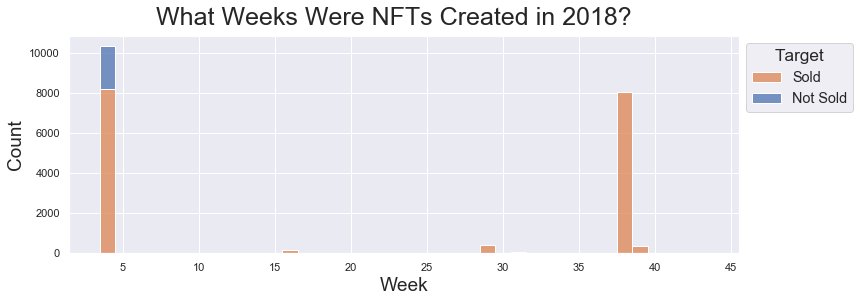

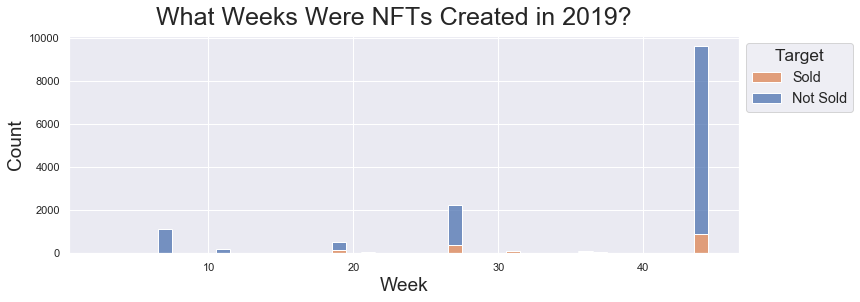

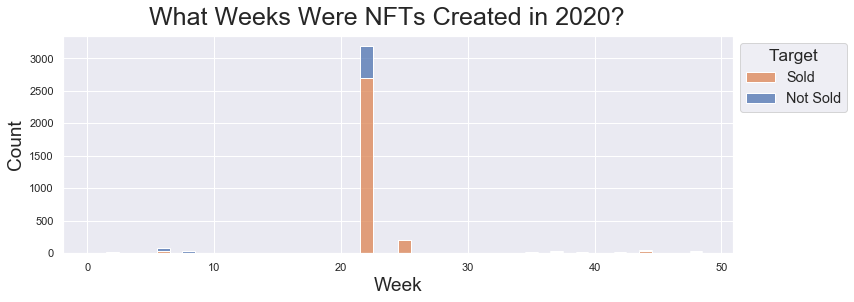

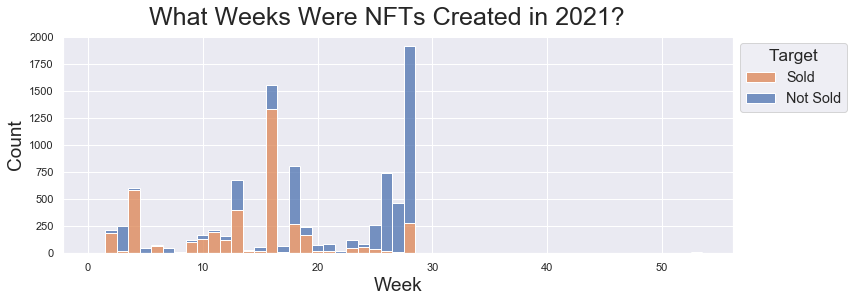

In [89]:
for week, year in weeks_years:
    fig, ax = plt.subplots(figsize=(12,4))
    sns.set(style="darkgrid")
    sns.histplot(x=week, 
                 hue=df_full['target'],
                 discrete=True,
                 multiple='stack',
                 ax=ax)
    fig.suptitle(f'What Weeks Were NFTs Created in {year}?', fontsize=25)
    ax.set_xlabel('Week', fontsize=19)
    ax.set_ylabel('Count', fontsize=19)
    plt.legend(title='Target', 
               title_fontsize = 'x-large',
               labels=['Sold', 'Not Sold'],
               fontsize="large", 
               loc = "upper left",
               bbox_to_anchor = (1,1))
    plt.show()

### What Days Were NFTs Created?

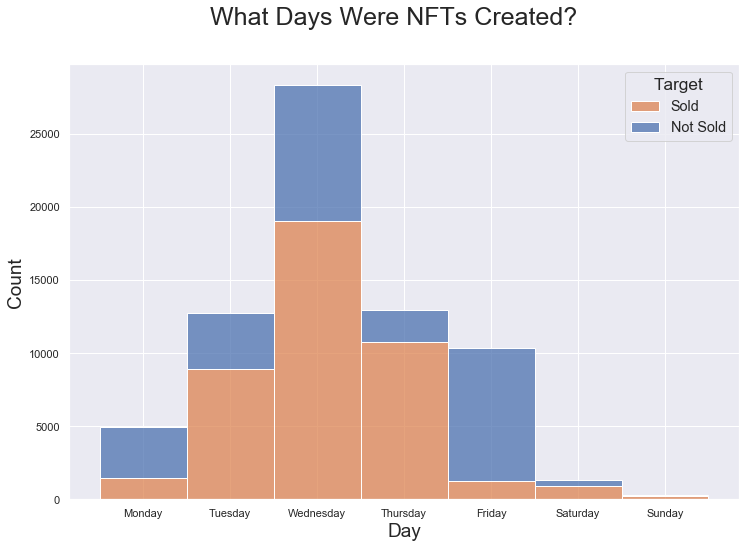

In [83]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(style="darkgrid")
sns.histplot(x=df_full['asset_contract.created_date'].dt.dayofweek, 
             hue=df_full['target'],
             discrete=True,
             multiple='stack',
             ax=ax)
plt.xticks([0,1,2,3,4,5,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig.suptitle('What Days Were NFTs Created?', fontsize=25)
ax.set_xlabel('Day', fontsize=19)
ax.set_ylabel('Count', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Sold', 'Not Sold'],
           fontsize="large", 
           loc='best')
plt.show()

# Post-Binary Transformation

## Import & Combine Data

In [4]:
parse_dates = ['asset_contract.created_date', 'collection.created_date']
df_binary1 = pd.read_csv('../data/nft_binary.csv', low_memory=False, parse_dates=parse_dates)
df_binary2 = pd.read_csv('../data/nft_binary2_test_set.csv', low_memory=False, parse_dates=parse_dates)
df_binary = pd.concat([df_binary1, df_binary2], ignore_index=True)

### Metadata

In [9]:
df_binary['token_metadata'].value_counts(normalize=True)

0    0.760089
1    0.239911
Name: token_metadata, dtype: float64

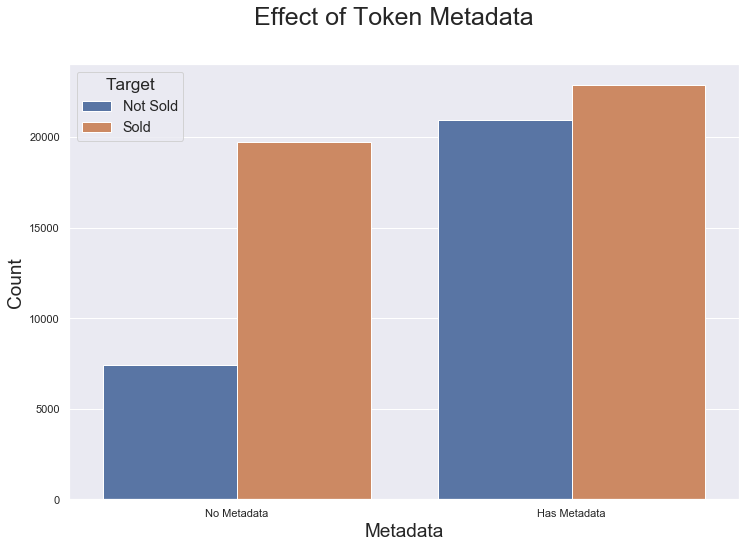

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(data=df_binary,
              x='traits',
              hue='target',
              ax=ax)
fig.suptitle('Effect of Token Metadata', fontsize=25)
plt.xticks([0,1],['No Metadata', 'Has Metadata'])
ax.set_xlabel('Metadata', fontsize=19)
ax.set_ylabel('Count', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='best')

### Asset Contract Total Supply

In [17]:
df_binary['asset_contract.total_supply'].value_counts(normalize=True)

0    0.733903
1    0.266097
Name: asset_contract.total_supply, dtype: float64

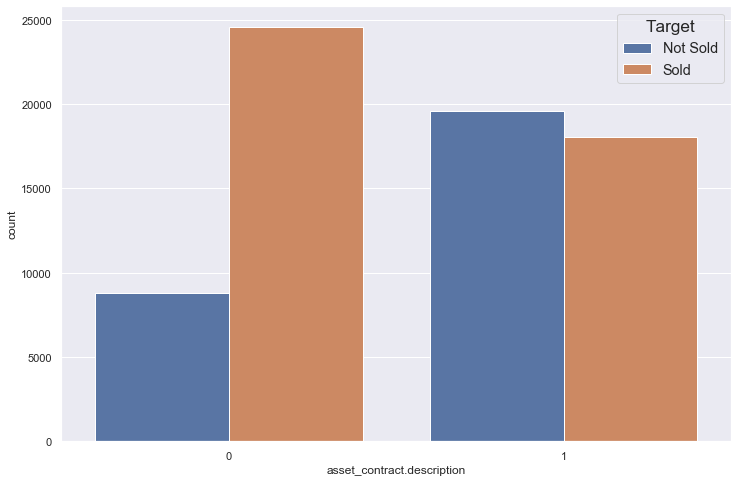

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(data=df_binary,
              x='asset_contract.description',
              hue='target',
              ax=ax)
# fig.suptitle('Effect of Supply', fontsize=25)
# plt.xticks([0,1],['No Metadata', 'Has Metadata'])
# ax.set_xlabel('Metadata', fontsize=19)
# ax.set_ylabel('Count', fontsize=19)
plt.legend(title='Target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='best')